<a href="https://colab.research.google.com/github/NastyaSNK/MISIS_DS_Masters_degree_2020/blob/master/internal_competitions/02_semesters/hakaton_1903/osnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intellivision vehicle image clustering by vehicle type (vdc_osnet set study)

In [1]:
# Importing modules
import pickle
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import skimage
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

### Framework

In [2]:
# K-Means clustering function

def Kmeans_simple_exc(n_clusters,random_state, X):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(X)
    return kmeans.predict(X)

# Metrics defining function

def quality(X, labels):
    return calinski_harabasz_score(X, labels),  davies_bouldin_score(X, labels)

def print_quantity_clusters(labels):
    unique, counts = np.unique(labels, return_counts=True)
    print (np.asarray((unique, counts)).T)

def elbow(K,data):
    chs_list = []
    db_list = []
    iteria_list = []
    for i in K:
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(data)
        chs,db = quality(data,kmeans.predict(data))
        chs_list.append(chs)
        db_list.append(db)
        iteria_list.append(kmeans.inertia_)
    plt.style.use('default')
    fig, axs = plt.subplots(1, 3)
    fig.set_size_inches(15,6)
    fig.suptitle('Метод локтя (Elbow method) для определения оптимального числа кластеров')
    [ax1, ax2, ax3]=axs
    axs[0].plot(K, chs_list, 'bx-')
    axs[0].set_title('calinski harabasz score')
    axs[1].plot(K, db_list, 'bx-')
    axs[1].set_title('davies bouldin score')
    axs[2].plot(K, iteria_list, 'bx-')
    axs[2].set_title('sum of squared distances of samples to their closest cluster center')
    plt.show()

# Визуализация
def plot_n_visualisations(n,data_low_dimentions,cluste_labels_list,title_list):
    plt.style.use('default')
    fig, axs = plt.subplots(1, n)
    fig.set_size_inches(20,6)
    axes_list = ['ax'+str(i) for i in range(1,n+1)]
    axes_list = axs

    for i,j in enumerate(cluste_labels_list):
        scatter = axs[i].scatter(data_low_dimentions[:,0], data_low_dimentions[:,1],c=cluste_labels_list[i], label=np.unique(cluste_labels_list[i]))
        axs[i].legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
        axs[i].set_title(title_list[i])
        
def plot_9_random_image(data,column,random):    
    import skimage.io
    import matplotlib.pyplot as plt
    %matplotlib inline

    for i in data[column].unique():
        plt.style.use('default')
        fig, axs = plt.subplots(1, 9)
        fig.set_size_inches(15,6)
        [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]=axs
        fig.suptitle(column+ ' номер кластера: '+str(i), fontsize=22, y=0.67)
        for k,j in enumerate(data.loc[data[column]==i,'paths'].sample(n=9, random_state=random,replace=False)):
            adress = '/content/drive/MyDrive/01_Hackathon_09/raw_data/veriwild/'+j
            img = skimage.io.imread(adress) # вызываем модуль io и указываем имя файла нашего изображения, загружаем изображение
            axs[k].imshow(img) # отрисовываем изображение во внутренний буфер pyplot
    plt.show()


def one_big_labeled_visualisation(data,clusters,title):
    """
    Plot one big 2D pic"""
    import matplotlib.pyplot as plt
    %matplotlib inline

    plt.style.use('default')
    fig, axs = plt.subplots(1, 1)
    fig.set_size_inches(14,9)
    plt.scatter(data[:,0], data[:,1],c=clusters, label=np.unique(clusters))
    plt.title(title)
    plt.show()

In [3]:
# Mini-Batch K-Means clustering function

def MiniBatchKmeans_exc(n_clusters, batch_size, init, random_state, X):
    
    """Return prediction the closest cluster each sample in X belongs to (an array object).
        
    Keyword arguments:
    n_clusters -- the number of clusters to form
    batch_size -- size of the mini batches
    init -- method for initialization ('k-means++','random')
    random_state -- random number generation for centroid initialization
    X -- data, an array object
    
    """
    minibatch_kmeans = MiniBatchKMeans(n_clusters=n_clusters, batch_size=batch_size, random_state=random_state)
    minibatch_kmeans.fit(X)
    return minibatch_kmeans.predict(X)

### Load the pickle file and take a look at the data:

In [4]:
#Подключаем свой диск. Инструкция по ссылке: https://docs.google.com/document/d/1cMHyY9hsKCv67PyFP5rE-PgMCbmZDcdp1j9lpXvYCqE/edit?usp=sharing
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pickle

filename01 = '/content/drive/MyDrive/01_Hackathon_09/descriptors/osnet.pickle'
X_osnet = pickle.load(open(filename01, 'rb'))
print('osnet shape:{}'.format(X_osnet.shape))
print(type(X_osnet))
X_osnet

osnet shape:(416314, 512)
<class 'numpy.ndarray'>


array([[0.        , 0.        , 0.        , ..., 0.73321515, 0.        ,
        5.9709315 ],
       [0.        , 0.        , 0.        , ..., 2.2757177 , 0.        ,
        0.9488349 ],
       [0.        , 0.        , 0.        , ..., 1.7822491 , 0.        ,
        3.8112872 ],
       ...,
       [0.        , 0.        , 0.        , ..., 3.7419376 , 0.        ,
        3.0801718 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        4.114627  ],
       [0.        , 0.        , 0.        , ..., 2.0509033 , 0.        ,
        4.501842  ]], dtype=float32)

In [ ]:
pd.DataFrame(X_osnet).describe()

0              1    ...            510            511
count  416314.000000  416314.000000  ...  416314.000000  416314.000000
mean        0.150352       0.351068  ...       0.176266       6.287836
std         0.402592       0.717785  ...       0.416717       3.129572
min         0.000000       0.000000  ...       0.000000       0.000000
25%         0.000000       0.000000  ...       0.000000       3.979304
50%         0.000000       0.000000  ...       0.000000       6.258415
75%         0.000000       0.373595  ...       0.063164       8.523288
max         5.836614       7.587684  ...       5.437577      19.238581

[8 rows x 512 columns]

### Preprocessing data

In [6]:
def norm_std(data):
  """Return 2 datasets: normed by lenght and standartize"""
  from sklearn.preprocessing import StandardScaler
  import numpy as np
  
  scaler = StandardScaler()
  data_std = scaler.fit_transform(data)
  length = np.sqrt((data**2).sum(axis=1))[:,None]
  data_normed = data / length
  return data_std, data_normed

# standartization and normalization

X_osnet_std, X_osnet_normed = norm_std(X_osnet)
X_osnet_normed

array([[0.        , 0.        , 0.        , ..., 0.02010678, 0.        ,
        0.16373941],
       [0.        , 0.        , 0.        , ..., 0.05713413, 0.        ,
        0.02382143],
       [0.        , 0.        , 0.        , ..., 0.04748167, 0.        ,
        0.10153815],
       ...,
       [0.        , 0.        , 0.        , ..., 0.11000824, 0.        ,
        0.09055316],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.11772242],
       [0.        , 0.        , 0.        , ..., 0.05386543, 0.        ,
        0.11823749]], dtype=float32)

### TSNE dimension reduce

**TSNE on GPU**

First choose GPU in colab menu [runtime environment]\
After execute commited code for Rapid installation

In [7]:
!nvidia-smi

Tue Mar 23 09:20:18 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
# Install RAPIDS
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!bash rapidsai-csp-utils/colab/rapids-colab.sh stable

import sys, os

dist_package_index = sys.path.index('/usr/local/lib/python3.7/dist-packages')
sys.path = sys.path[:dist_package_index] + ['/usr/local/lib/python3.7/site-packages'] + sys.path[dist_package_index:]
sys.path
exec(open('rapidsai-csp-utils/colab/update_modules.py').read(), globals())

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 205 (delta 16), reused 3 (delta 0), pack-reused 171
Receiving objects: 100% (205/205), 62.72 KiB | 1.61 MiB/s, done.
Resolving deltas: 100% (78/78), done.
PLEASE READ
********************************************************************************************************
Changes:
1. IMPORTANT SCRIPT CHANGES: Colab has updated to Python 3.7, and now runs our STABLE and NIGHTLY versions (0.18 and 0.19)!  PLEASE update your older install script code as follows:
	!bash rapidsai-csp-utils/colab/rapids-colab.sh 0.18

	import sys, os

	dist_package_index = sys.path.index('/usr/local/lib/python3.7/dist-packages')
	sys.path = sys.path[:dist_package_index] + ['/usr/local/lib/python3.7/site-packages'] + sys.path[dist_package_index:]
	sys.path
	exec(open('rapidsai-csp-utils/colab/update_modules.py').read(), globals(

In [9]:
def tsne_transformation(data):
    """
    Return reduced tsne dataset
    """
    from cuml.manifold import TSNE
    import cudf


    tsne = TSNE(learning_rate_method='none', perplexity=50, n_neighbors=32, n_iter=1000)
    X_tsne = tsne.fit_transform(data)
    return X_tsne


# tsne dimension reduction color set
X_osnet_tsne = tsne_transformation(X_osnet)
X_osnet_std_tsne = tsne_transformation(X_osnet_std)
X_osnet_normed_tsne = tsne_transformation(X_osnet_normed)
X_osnet_std_tsne

[W] [09:37:00.680514] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
[W] [09:37:38.718479] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...
[W] [09:38:15.602468] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


array([[ -2.632727 ,  17.445042 ],
       [-20.01705  ,  -3.0572429],
       [  3.3622143, -17.079882 ],
       ...,
       [-10.146583 ,   5.497051 ],
       [ -9.49184  ,  -1.5785189],
       [ -8.2522335,   2.0308948]], dtype=float32)

# K-Means and mini-Batch k-Means clustering experiments

Lets check the %%time of the K-means algorithm with 8 clusters (default parameters from sklearn.cluster.KMeans) 

In [ ]:
%%time
kmeans_8_cluster_osnet = Kmeans_simple_exc(8,0,X_osnet_std_tsne)

CPU times: user 9.69 s, sys: 123 ms, total: 9.81 s
Wall time: 9.81 s


In [ ]:
%%time
minibatch_kmeans_8_cluster_osnet = MiniBatchKmeans_exc(8,100,'k-means++', 0, X_osnet_std_tsne)

CPU times: user 2.77 s, sys: 2.65 ms, total: 2.78 s
Wall time: 2.78 s


 **Mini-Batch k-Means is much faster.  Use function to indicate metrics: calinski_harabasz_score and davies_bouldin_score** 

In [ ]:
quality(X_osnet, kmeans_8_cluster_osnet)

(7859.851656316719, 5.492514688572962)

In [ ]:
quality(X_osnet, minibatch_kmeans_8_cluster_osnet)

(8379.391316443647, 5.151563843586867)

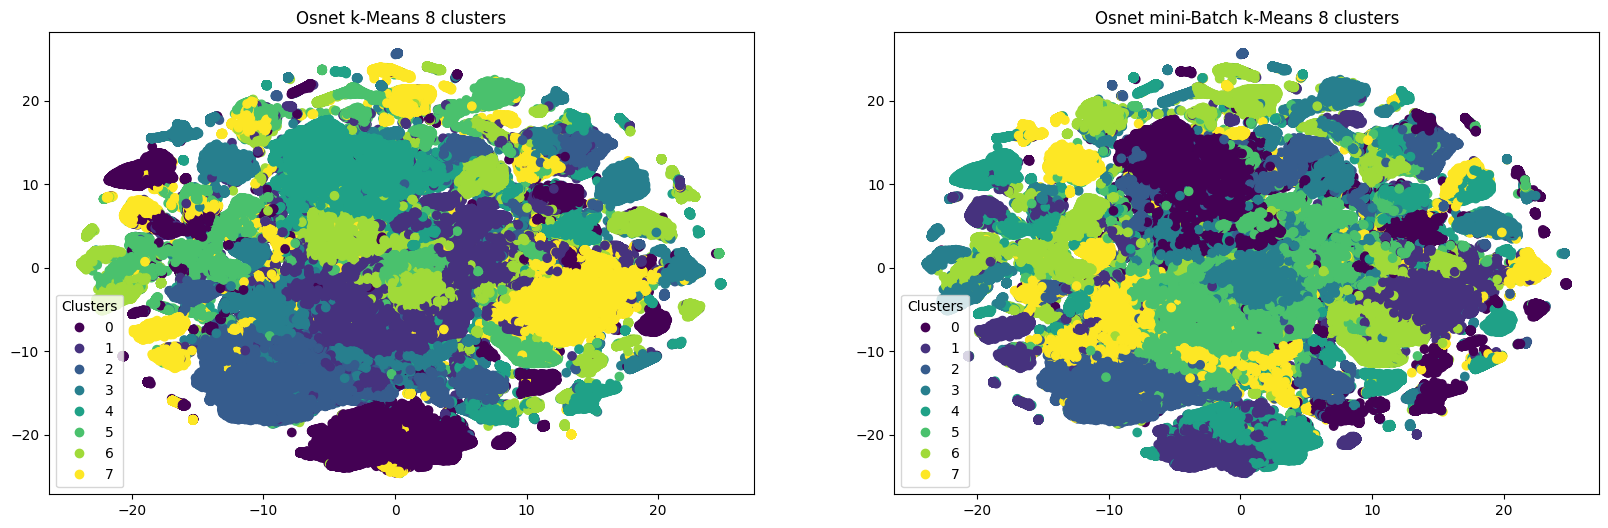

In [ ]:
plot_n_visualisations(2,X_osnet_tsne,[kmeans_8_cluster_osnet,minibatch_kmeans_8_cluster_osnet],['Osnet k-Means 8 clusters','Osnet mini-Batch k-Means 8 clusters'])

we can see that different algorithms provide slightly different results

**Try to defind the optimal number of cluster by 'elbow method'**

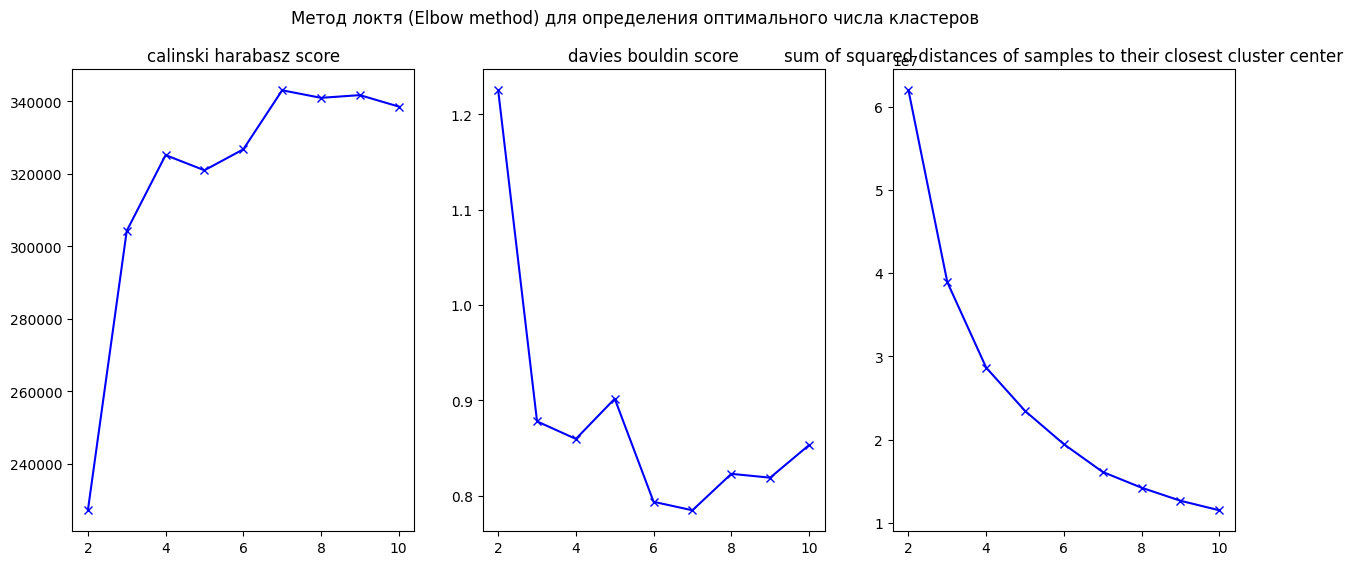

In [ ]:
elbow(range(2,11),X_osnet_std_tsne)

The optimal number of clusters is 3,4

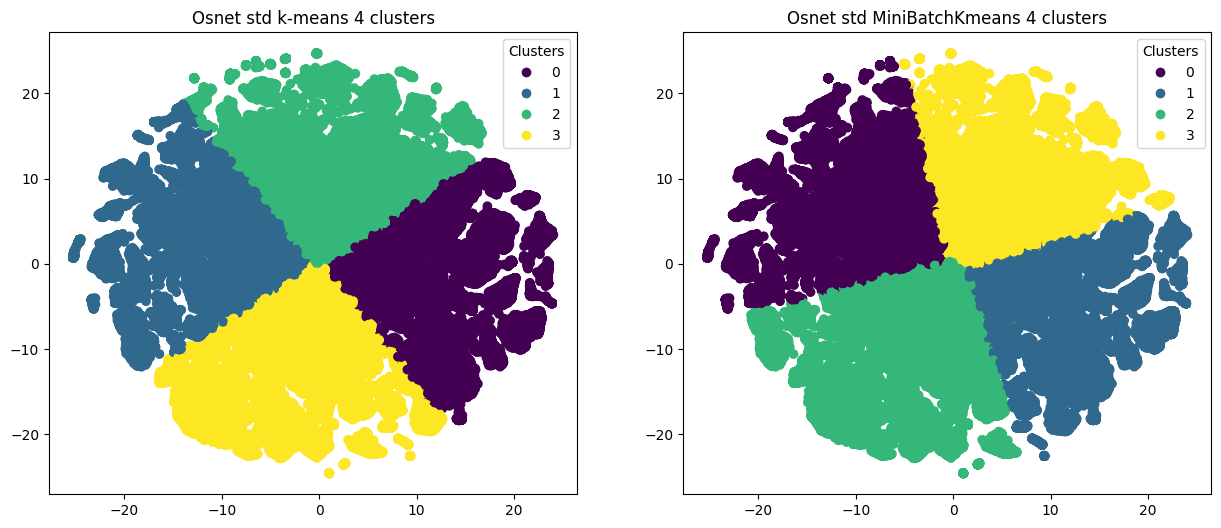

In [ ]:
kmeans_3_cluster_osnet_std = Kmeans_simple_exc(4,0,X_osnet_std_tsne)
minibatch_kmeans_3_cluster_osnet_std = MiniBatchKmeans_exc(4,100,'k-means++', 0, X_osnet_std_tsne)

plt.style.use('default')
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(15,6)
[ax1, ax2]=axs

scatter0 = axs[0].scatter(X_osnet_std_tsne[:,0], X_osnet_std_tsne[:,1],c=kmeans_3_cluster_osnet_std, label=np.unique(kmeans_3_cluster_osnet_std))
axs[0].legend(*scatter0.legend_elements(),
                    loc="upper right", title="Clusters")
axs[0].set_title('Osnet std k-means 4 clusters')
scatter1 = axs[1].scatter(X_osnet_std_tsne[:,0], X_osnet_std_tsne[:,1],c=minibatch_kmeans_3_cluster_osnet_std, label=np.unique(minibatch_kmeans_3_cluster_osnet_std))
axs[1].legend(*scatter1.legend_elements(),
                    loc="upper right", title="Clusters")
axs[1].set_title('Osnet std MiniBatchKmeans 4 clusters')
plt.show()

**Compare the results using metrics calinski_harabasz_score, davies_bouldin_score**

**k-Means**

In [ ]:
result_kmeans_score_osnet_df = pd.DataFrame(index=['2_cluster','3_cluster','4_cluster','5_cluster','6_cluster', '7_cluster'], columns = ['ch_kmeans_osnet_std','db_kmeans_osnet_std'] )

In [ ]:
for i,j in zip(range(2,8),['2_cluster','3_cluster','4_cluster','5_cluster','6_cluster', '7_cluster']):
    result_kmeans_score_osnet_df.loc[j,['ch_kmeans_osnet_std','db_kmeans_osnet_std']]  = quality(X_osnet_std_tsne, Kmeans_simple_exc(i,0,X_osnet_std_tsne))
result_kmeans_score_osnet_df

ch_kmeans_osnet_std db_kmeans_osnet_std
2_cluster              227175             1.22528
3_cluster              304264            0.877996
4_cluster              325165            0.859614
5_cluster              320972            0.901804
6_cluster              326751            0.793649
7_cluster              343043            0.784773

In [ ]:
result_kmeans_score_df = pd.DataFrame(index=['2_cluster','3_cluster','4_cluster','5_cluster','6_cluster', '7_cluster'], 
                                      columns = ['ch_kmeans_osnet_normed_tsne','db_kmeans_osnet_normed_tsne'])

In [ ]:
for i,j in zip(range(2,8),['2_cluster','3_cluster','4_cluster','5_cluster','6_cluster', '7_cluster']):
    result_kmeans_score_df.loc[j,['ch_kmeans_osnet_normed_tsne','db_kmeans_osnet_normed_tsne']] = quality(X_osnet_normed_tsne, Kmeans_simple_exc(i,0,X_osnet_normed_tsne))
result_kmeans_score_df

ch_kmeans_osnet_normed_tsne db_kmeans_osnet_normed_tsne
2_cluster                      245361                      1.1834
3_cluster                      314204                    0.866075
4_cluster                      332602                    0.864124
5_cluster                      331642                    0.897564
6_cluster                      342220                    0.783078
7_cluster                      345251                    0.795642

**mini-Batch k-Means**

In [ ]:
result_minibatch_kmeans_score_osnet_df = pd.DataFrame(index=['2_cluster','3_cluster','4_cluster','5_cluster','6_cluster', '7_cluster'], 
                                                      columns = ['ch_minibatch_kmeans_osnet_std','db_minibatch_kmeans_osnet_std'] )

In [ ]:
for i,j in zip(range(2,8),['2_cluster','3_cluster','4_cluster','5_cluster','6_cluster', '7_cluster']):
    result_minibatch_kmeans_score_osnet_df.loc[j,['ch_minibatch_kmeans_osnet_std','db_minibatch_kmeans_osnet_std']]  = quality(X_osnet_std_tsne, MiniBatchKmeans_exc(i,100,'k-means++', 0, X_osnet_std_tsne))
result_minibatch_kmeans_score_osnet_df

ch_minibatch_kmeans_osnet_std db_minibatch_kmeans_osnet_std
2_cluster                        226041                       1.22768
3_cluster                        289285                      0.895349
4_cluster                        317875                       0.86514
5_cluster                        293462                      0.929465
6_cluster                        321834                      0.801379
7_cluster                        331839                      0.816352

In [ ]:
result_minibatch_kmeans_score_osnet_df = pd.DataFrame(index=['2_cluster','3_cluster','4_cluster','5_cluster','6_cluster', '7_cluster'], 
                                                      columns = ['ch_minibatch_kmeans_osnet_normed','db_minibatch_kmeans_osnet_normed'])

In [ ]:
for i,j in zip(range(2,8),['2_cluster','3_cluster','4_cluster','5_cluster','6_cluster', '7_cluster']):
    result_minibatch_kmeans_score_osnet_df.loc[j,['ch_minibatch_kmeans_osnet_normed','db_minibatch_kmeans_osnet_normed']]  = quality(X_osnet_normed_tsne, MiniBatchKmeans_exc(i,100,'k-means++', 0, X_osnet_normed_tsne))
result_minibatch_kmeans_score_osnet_df

ch_minibatch_kmeans_osnet_normed db_minibatch_kmeans_osnet_normed
2_cluster                           232789                          1.21074
3_cluster                           313879                          0.87481
4_cluster                           331461                         0.865779
5_cluster                           328720                         0.899309
6_cluster                           340293                         0.810173
7_cluster                           342136                         0.824446

result metrics is better for kmeans alghorithm instead of its faster realisation

**Make k-Means clustering with different parameters**

In [10]:
#std miniBatch k-means
minibatch_kmeans_2_cluster_osnet_std = MiniBatchKmeans_exc(2,100,'k-means++', 0, X_osnet_std_tsne)
minibatch_kmeans_3_cluster_osnet_std = MiniBatchKmeans_exc(3,100,'k-means++', 0, X_osnet_std_tsne)
minibatch_kmeans_4_cluster_osnet_std = MiniBatchKmeans_exc(4,100,'k-means++', 0, X_osnet_std_tsne)
minibatch_kmeans_5_cluster_osnet_std = MiniBatchKmeans_exc(5,100,'k-means++', 0, X_osnet_std_tsne)
minibatch_kmeans_6_cluster_osnet_std = MiniBatchKmeans_exc(6,100,'k-means++', 0, X_osnet_std_tsne)
minibatch_kmeans_7_cluster_osnet_std = MiniBatchKmeans_exc(7,100,'k-means++', 0, X_osnet_std_tsne)

In [ ]:
print('\033[1mminibatch-Kmeans_2_cluster_osnet_std\033[0m')
print_quantity_clusters(minibatch_kmeans_2_cluster_osnet_std)
print('\033[1mminibatch-Kmeans_3_cluster_osnet_std\033[0m')
print_quantity_clusters(minibatch_kmeans_3_cluster_osnet_std)
print('\033[1mminibatch-Kmeans_4_cluster_osnet_std\033[0m')
print_quantity_clusters(minibatch_kmeans_4_cluster_osnet_std)
print('\033[1mminibatch-Kmeans_5_cluster_osnet_std\033[0m')
print_quantity_clusters(minibatch_kmeans_5_cluster_osnet_std)
print('\033[1mminibatch-Kmeans_6_cluster_osnet_std\033[0m')
print_quantity_clusters(minibatch_kmeans_6_cluster_osnet_std)
print('\033[1mminibatch-Kmeans_7_cluster_osnet_std\033[0m')
print_quantity_clusters(minibatch_kmeans_7_cluster_osnet_std)

minibatch-Kmeans_2_cluster_osnet_std
[[     0 204602]
 [     1 211712]]
minibatch-Kmeans_3_cluster_osnet_std
[[     0 135450]
 [     1 134713]
 [     2 146151]]
minibatch-Kmeans_4_cluster_osnet_std
[[     0 108772]
 [     1  90044]
 [     2 114553]
 [     3 102945]]
minibatch-Kmeans_5_cluster_osnet_std
[[    0 87887]
 [    1 81249]
 [    2 82438]
 [    3 91439]
 [    4 73301]]
minibatch-Kmeans_6_cluster_osnet_std
[[    0 73030]
 [    1 59305]
 [    2 77144]
 [    3 79497]
 [    4 64908]
 [    5 62430]]
minibatch-Kmeans_7_cluster_osnet_std
[[    0 64825]
 [    1 48797]
 [    2 68562]
 [    3 55926]
 [    4 54201]
 [    5 58791]
 [    6 65212]]


In [11]:
#normed miniBatch k-means
minibatch_kmeans_2_cluster_osnet_normed = MiniBatchKmeans_exc(2,100,'k-means++', 0, X_osnet_normed_tsne)
minibatch_kmeans_3_cluster_osnet_normed = MiniBatchKmeans_exc(3,100,'k-means++', 0, X_osnet_normed_tsne)
minibatch_kmeans_4_cluster_osnet_normed = MiniBatchKmeans_exc(4,100,'k-means++', 0, X_osnet_normed_tsne)
minibatch_kmeans_5_cluster_osnet_normed = MiniBatchKmeans_exc(5,100,'k-means++', 0, X_osnet_normed_tsne)
minibatch_kmeans_6_cluster_osnet_normed = MiniBatchKmeans_exc(6,100,'k-means++', 0, X_osnet_normed_tsne)
minibatch_kmeans_7_cluster_osnet_normed = MiniBatchKmeans_exc(7,100,'k-means++', 0, X_osnet_normed_tsne)

In [ ]:
print('\033[1mminibatch-Kmeans_2_cluster_osnet_normed\033[0m')
print_quantity_clusters(minibatch_kmeans_2_cluster_osnet_normed)
print('\033[1mminibatch-Kmeans_3_cluster_osnet_normed\033[0m')
print_quantity_clusters(minibatch_kmeans_3_cluster_osnet_normed)
print('\033[1mminibatch-Kmeans_4_cluster_osnet_normed\033[0m')
print_quantity_clusters(minibatch_kmeans_4_cluster_osnet_normed)
print('\033[1mminibatch-Kmeans_5_cluster_osnet_normed\033[0m')
print_quantity_clusters(minibatch_kmeans_5_cluster_osnet_normed)
print('\033[1mminibatch-Kmeans_6_cluster_osnet_normed\033[0m')
print_quantity_clusters(minibatch_kmeans_6_cluster_osnet_normed)
print('\033[1mminibatch-Kmeans_7_cluster_osnet_normed\033[0m')
print_quantity_clusters(minibatch_kmeans_7_cluster_osnet_normed)

minibatch-Kmeans_2_cluster_osnet_normed
[[     0 191981]
 [     1 224333]]
minibatch-Kmeans_3_cluster_osnet_normed
[[     0 140997]
 [     1 131541]
 [     2 143776]]
minibatch-Kmeans_4_cluster_osnet_normed
[[     0 105576]
 [     1 114227]
 [     2  94572]
 [     3 101939]]
minibatch-Kmeans_5_cluster_osnet_normed
[[    0 75429]
 [    1 98098]
 [    2 81528]
 [    3 82131]
 [    4 79128]]
minibatch-Kmeans_6_cluster_osnet_normed
[[    0 66673]
 [    1 69647]
 [    2 71446]
 [    3 71821]
 [    4 61685]
 [    5 75042]]
minibatch-Kmeans_7_cluster_osnet_normed
[[    0 53813]
 [    1 70508]
 [    2 62803]
 [    3 54333]
 [    4 55848]
 [    5 64492]
 [    6 54517]]


In [12]:
kmeans_2_cluster_osnet_std = Kmeans_simple_exc(2,0,X_osnet_std_tsne)
kmeans_2_cluster_osnet_normed = Kmeans_simple_exc(2,0,X_osnet_normed_tsne)

kmeans_3_cluster_osnet_std = Kmeans_simple_exc(3,0,X_osnet_std_tsne)
kmeans_3_cluster_osnet_normed = Kmeans_simple_exc(3,0,X_osnet_normed_tsne)

kmeans_4_cluster_osnet_std = Kmeans_simple_exc(4,0,X_osnet_std_tsne)
kmeans_4_cluster_osnet_normed = Kmeans_simple_exc(4,0,X_osnet_normed_tsne)

kmeans_6_cluster_osnet_std = Kmeans_simple_exc(6,0,X_osnet_std_tsne)
kmeans_6_cluster_osnet_normed = Kmeans_simple_exc(6,0,X_osnet_normed_tsne)

kmeans_7_cluster_osnet_std = Kmeans_simple_exc(7,0,X_osnet_std_tsne)
kmeans_7_cluster_osnet_normed = Kmeans_simple_exc(7,0,X_osnet_normed_tsne)

### Vizualization for K-means clustering

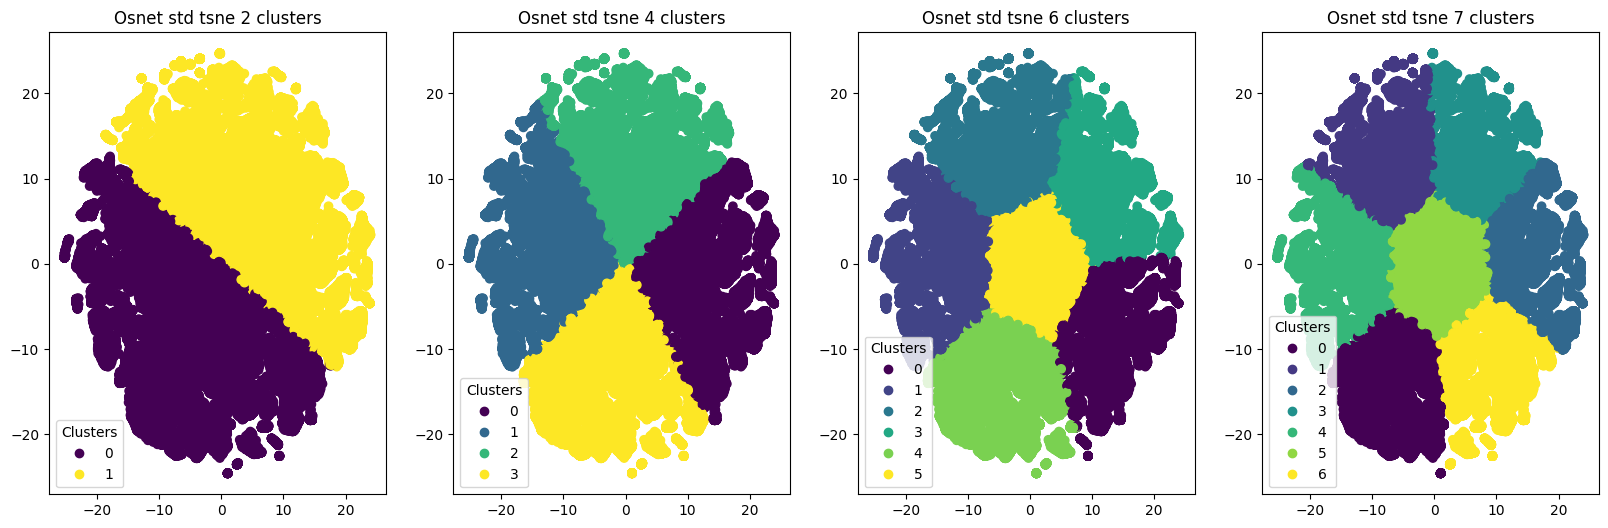

In [ ]:
plot_n_visualisations(4,X_osnet_std_tsne,[kmeans_2_cluster_osnet_std,kmeans_4_cluster_osnet_std,kmeans_6_cluster_osnet_std,kmeans_7_cluster_osnet_std],['Osnet std tsne 2 clusters','Osnet std tsne 4 clusters','Osnet std tsne 6 clusters','Osnet std tsne 7 clusters'])

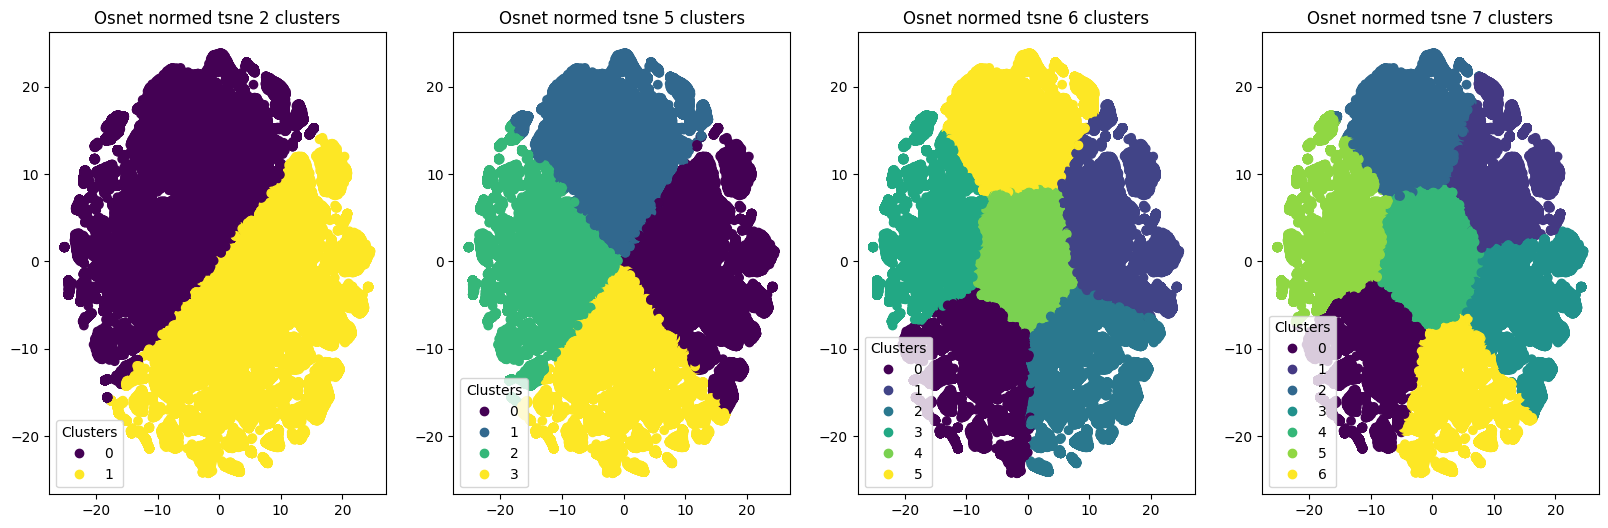

In [ ]:
plot_n_visualisations(4,X_osnet_normed_tsne,[kmeans_2_cluster_osnet_normed,kmeans_4_cluster_osnet_normed,kmeans_6_cluster_osnet_normed,kmeans_7_cluster_osnet_normed],['Osnet normed tsne 2 clusters','Osnet normed tsne 5 clusters','Osnet normed tsne 6 clusters','Osnet normed tsne 7 clusters'])

### Vizualization for mini-Banch K-means clustering

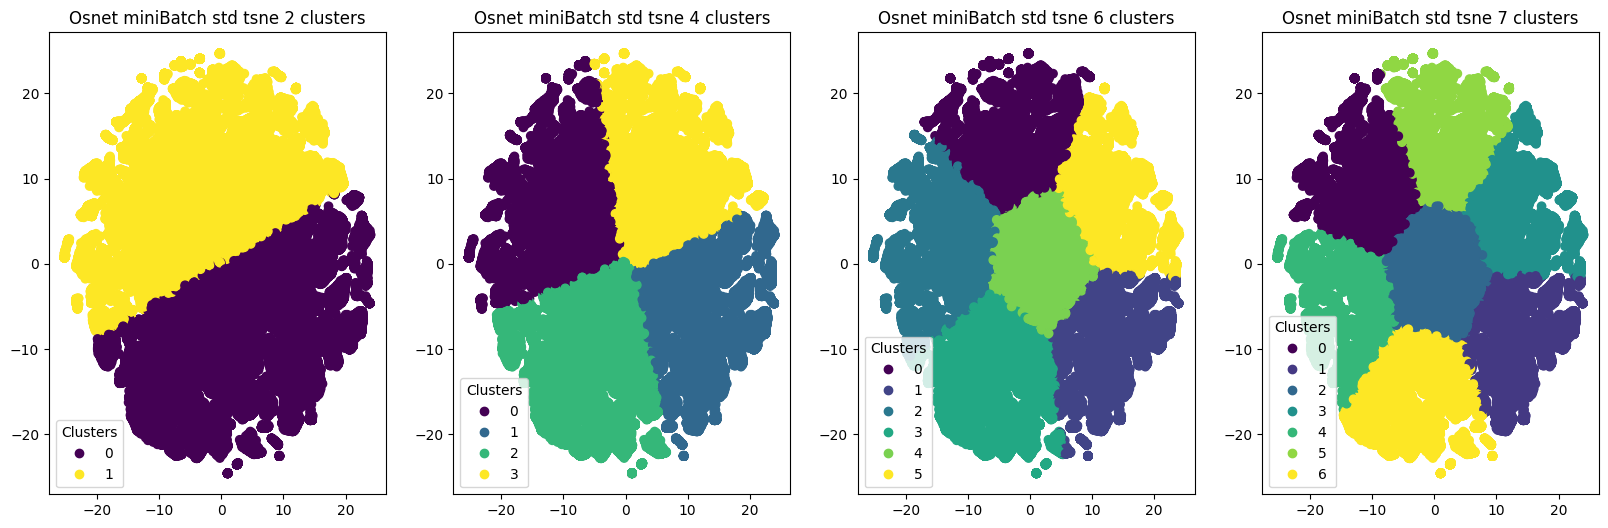

In [ ]:
plot_n_visualisations(4,X_osnet_std_tsne,[minibatch_kmeans_2_cluster_osnet_std, minibatch_kmeans_4_cluster_osnet_std, minibatch_kmeans_6_cluster_osnet_std, minibatch_kmeans_7_cluster_osnet_std],['Osnet miniBatch std tsne 2 clusters','Osnet miniBatch std tsne 4 clusters','Osnet miniBatch std tsne 6 clusters','Osnet miniBatch std tsne 7 clusters'])

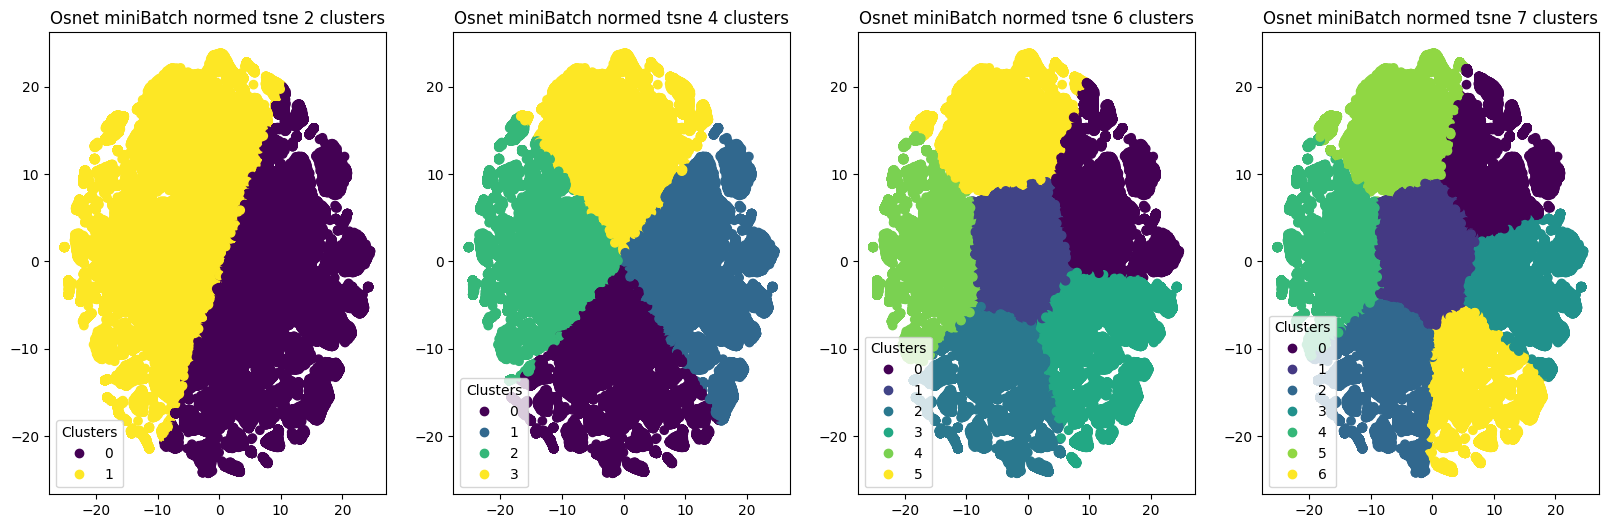

In [ ]:
plot_n_visualisations(4,X_osnet_normed_tsne,[minibatch_kmeans_2_cluster_osnet_normed, minibatch_kmeans_4_cluster_osnet_normed, minibatch_kmeans_6_cluster_osnet_normed, minibatch_kmeans_7_cluster_osnet_normed],['Osnet miniBatch normed tsne 2 clusters','Osnet miniBatch normed tsne 4 clusters','Osnet miniBatch normed tsne 6 clusters','Osnet miniBatch normed tsne 7 clusters'])

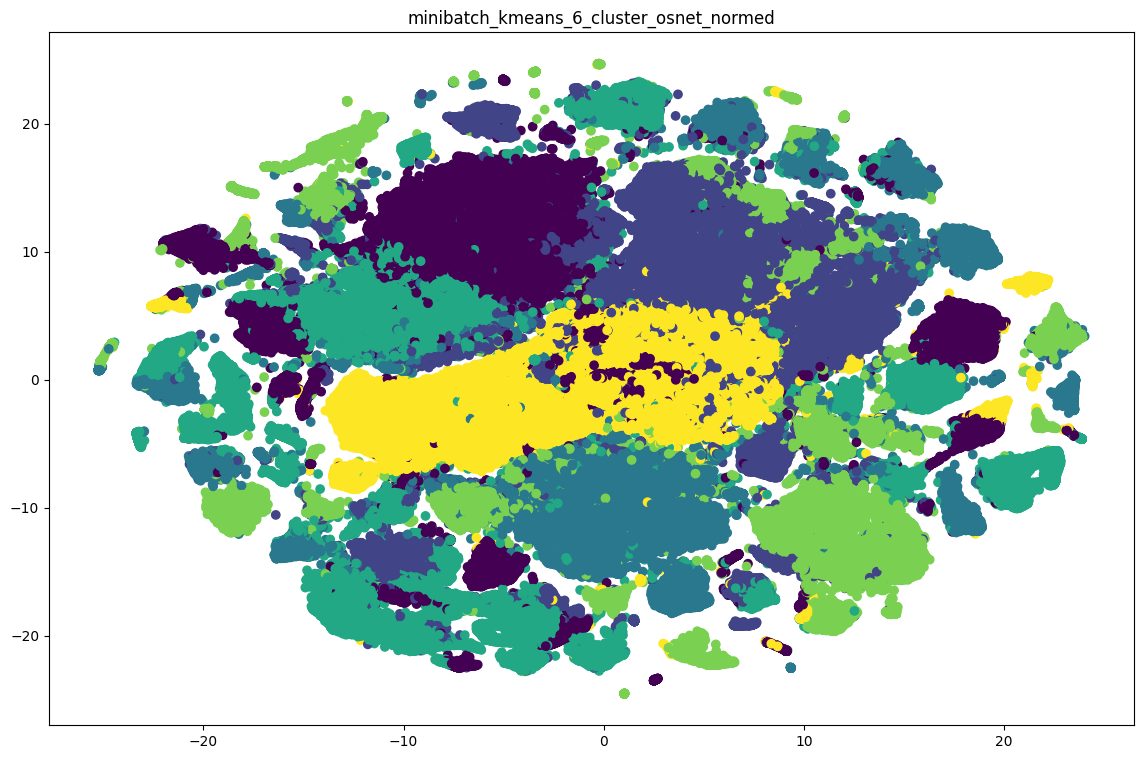

In [ ]:
one_big_labeled_visualisation(X_osnet_std_tsne,minibatch_kmeans_6_cluster_osnet_normed,'minibatch_kmeans_6_cluster_osnet_normed')

# RESULTS

In [13]:
import pandas as pd
images_paths = pd.read_csv('/content/drive/MyDrive/01_Hackathon_09/images_paths.csv')
images_paths_parsed = pd.concat([images_paths,images_paths['paths'].str.split('\\',expand=True)],axis=1)
images_paths_parsed[images_paths_parsed.duplicated(subset=[3])]

Empty DataFrame
Columns: [paths, 0, 1, 2, 3]
Index: []

In [16]:
images_paths_final = images_paths.copy()
images_paths_final['kmeans_2_cluster_osnet_std'] = kmeans_2_cluster_osnet_std
images_paths_final['kmeans_3_cluster_osnet_std'] = kmeans_3_cluster_osnet_std
images_paths_final['kmeans_4_cluster_osnet_std'] = kmeans_4_cluster_osnet_std
images_paths_final['kmeans_6_cluster_osnet_std'] = kmeans_6_cluster_osnet_std
images_paths_final['kmeans_7_cluster_osnet_std'] = kmeans_7_cluster_osnet_std

images_paths_final['kmeans_2_cluster_osnet_normed'] = kmeans_2_cluster_osnet_normed
images_paths_final['kmeans_3_cluster_osnet_normed'] = kmeans_3_cluster_osnet_normed
images_paths_final['kmeans_4_cluster_osnet_normed'] = kmeans_4_cluster_osnet_normed
images_paths_final['kmeans_6_cluster_osnet_normed'] = kmeans_6_cluster_osnet_normed
images_paths_final['kmeans_7_cluster_osnet_normed'] = kmeans_7_cluster_osnet_normed

images_paths_final['paths'] = images_paths_final['paths'].str.replace('\\','/') 
images_paths_final.to_csv('images_paths_final_osnet.csv')
images_paths_final.head(20)

paths  ...  kmeans_7_cluster_osnet_normed
0   veriwild/1/00001/000001.jpg  ...                              4
1   veriwild/1/00001/000002.jpg  ...                              2
2   veriwild/1/00001/000003.jpg  ...                              4
3   veriwild/1/00001/000004.jpg  ...                              4
4   veriwild/1/00001/000005.jpg  ...                              4
5   veriwild/1/00001/000006.jpg  ...                              1
6   veriwild/1/00002/000007.jpg  ...                              6
7   veriwild/1/00002/000008.jpg  ...                              6
8   veriwild/1/00002/000009.jpg  ...                              6
9   veriwild/1/00002/000010.jpg  ...                              3
10  veriwild/1/00002/000011.jpg  ...                              1
11  veriwild/1/00003/000012.jpg  ...                              0
12  veriwild/1/00003/000013.jpg  ...                              3
13  veriwild/1/00003/000014.jpg  ...                              5
14  veriwild/1/00003/000015.jpg  ...                              3
15  veriwild/1/00004/000016.jpg  ...                              0
16  veriwild/1/00004/000017.jpg  ...                              6
17  veriwild/1/00004/000018.jpg  ...                              3
18  veriwild/1/00004/000019.jpg  ...                              0
19  veriwild/1/00004/000020.jpg  ...                              0

[20 rows x 11 columns]

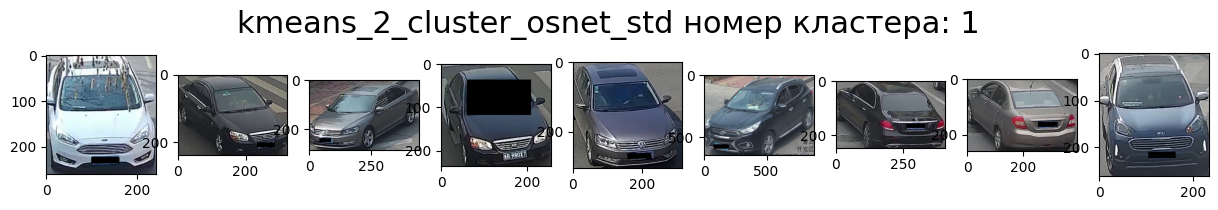

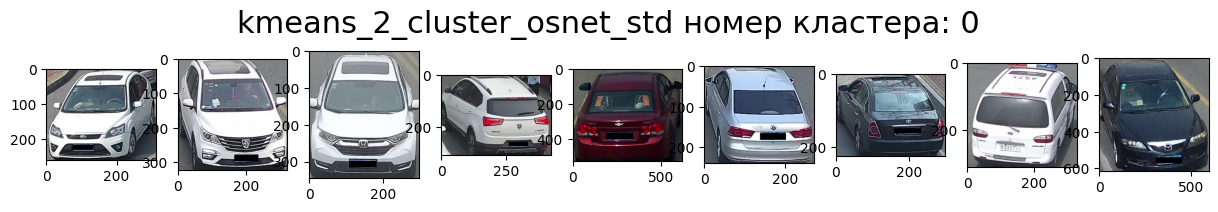

In [ ]:
plot_9_random_image(images_paths_final,'kmeans_2_cluster_osnet_std',1) 

## front view / back view

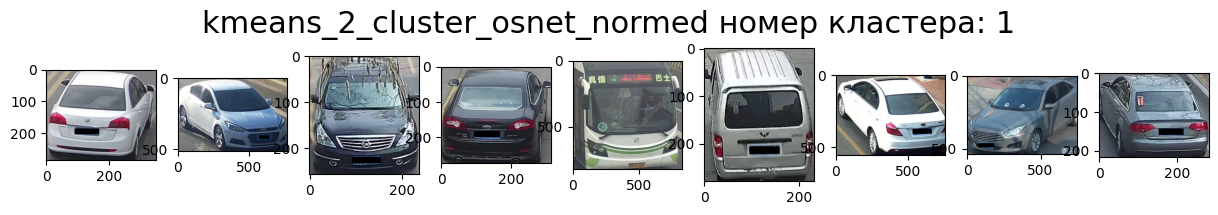

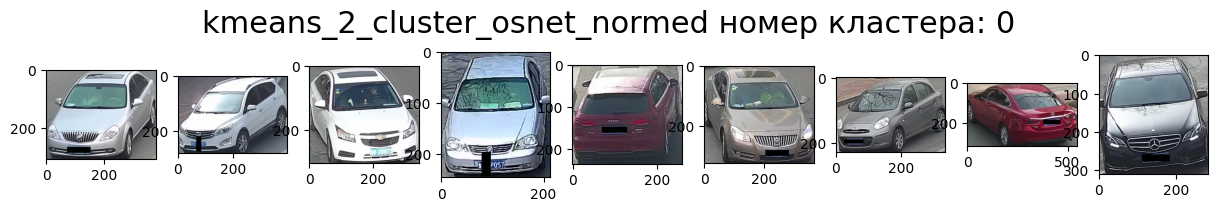

In [ ]:
plot_9_random_image(images_paths_final,'kmeans_2_cluster_osnet_normed',1)

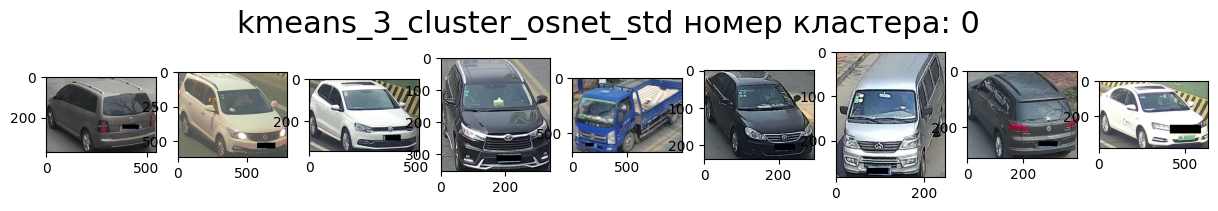

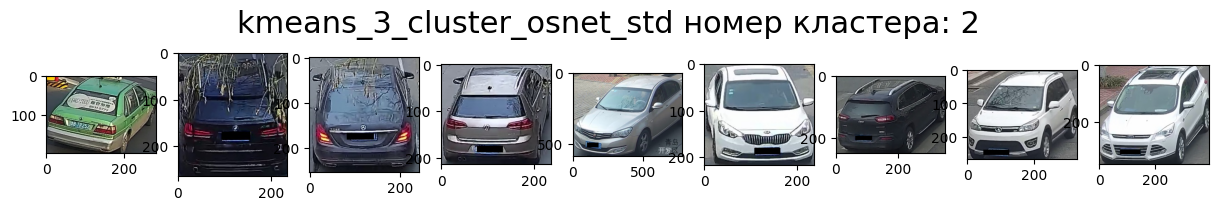

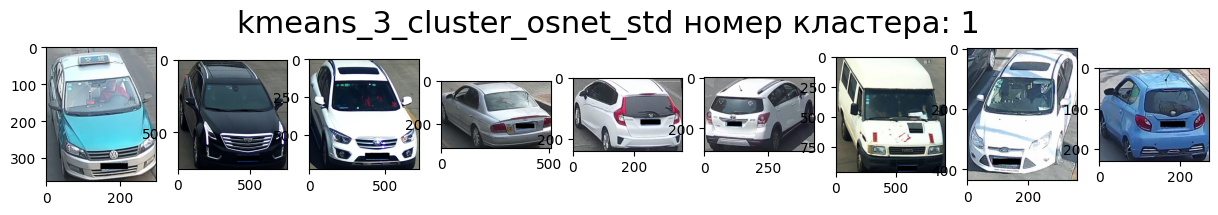

In [ ]:
plot_9_random_image(images_paths_final,'kmeans_3_cluster_osnet_std',3)

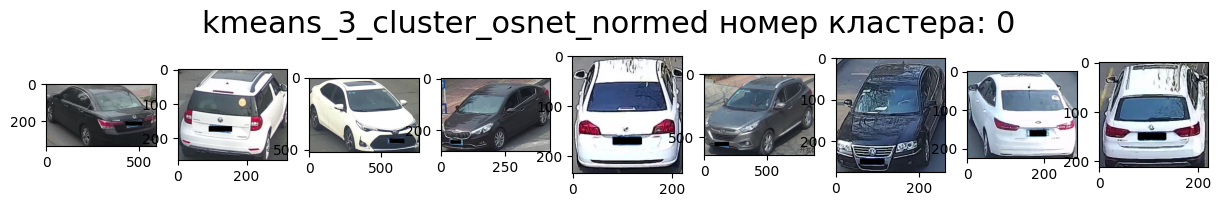

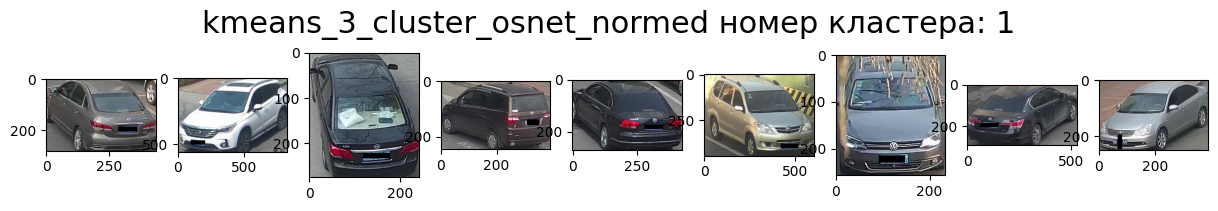

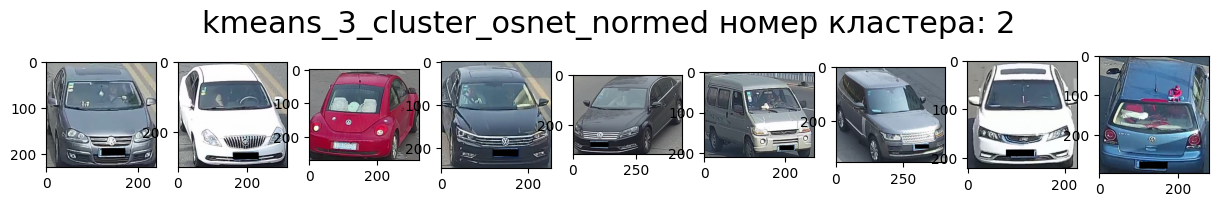

In [ ]:
plot_9_random_image(images_paths_final,'kmeans_3_cluster_osnet_normed',1)

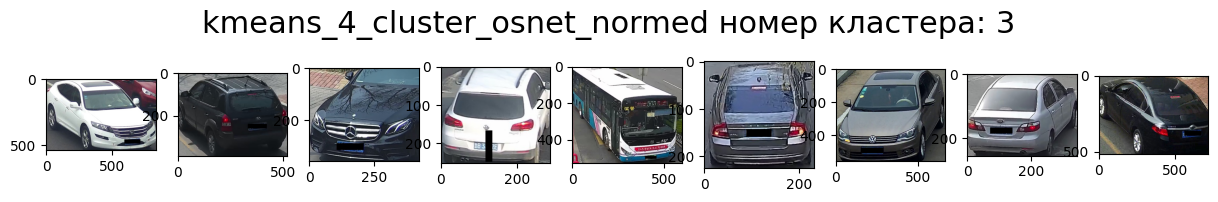

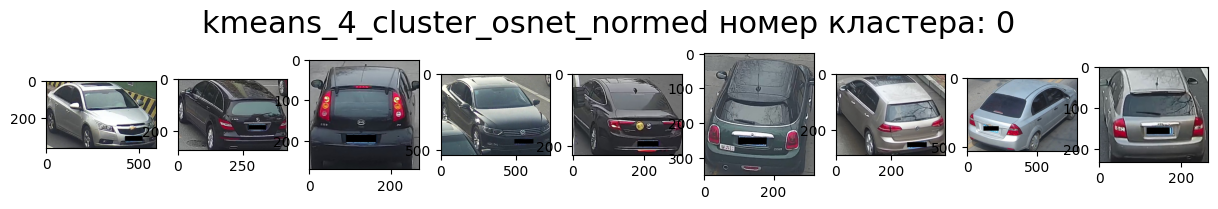

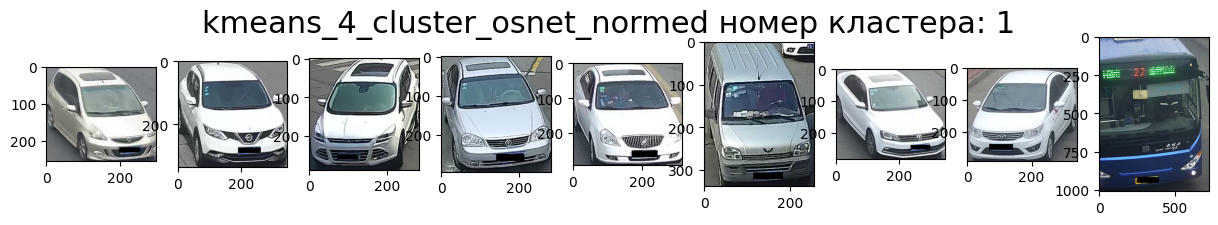

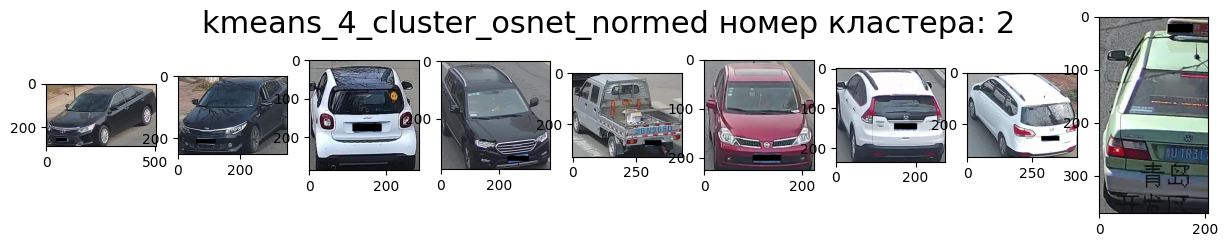

In [ ]:
plot_9_random_image(images_paths_final,'kmeans_4_cluster_osnet_normed',1)

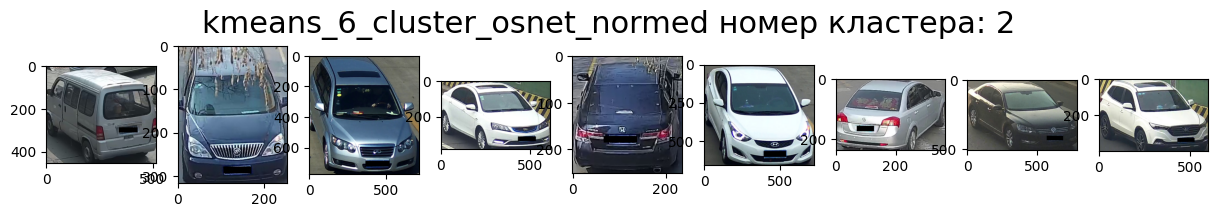

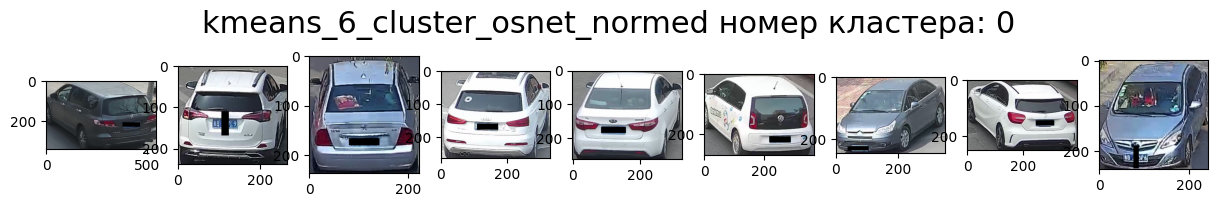

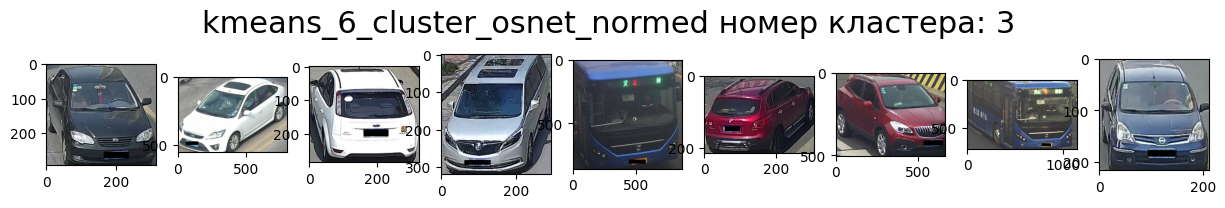

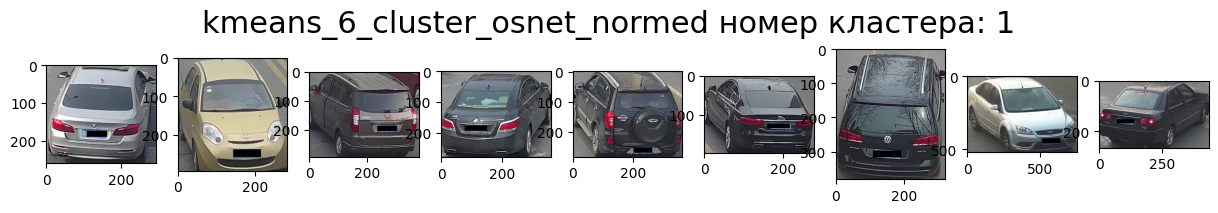

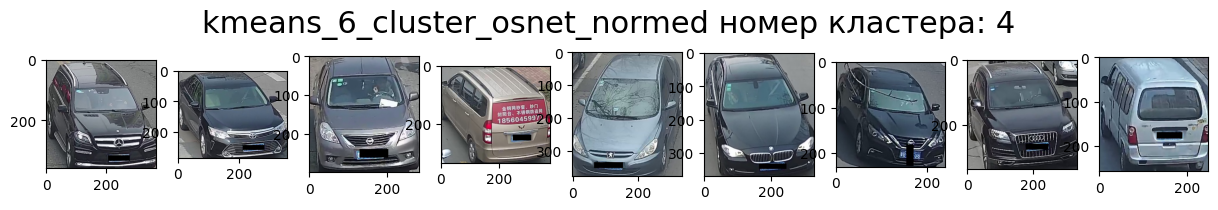

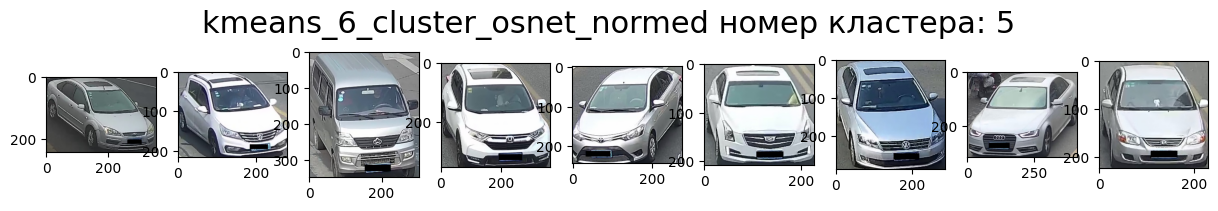

In [ ]:
plot_9_random_image(images_paths_final,'kmeans_6_cluster_osnet_normed',1)

## light -front view / dark -front view / color

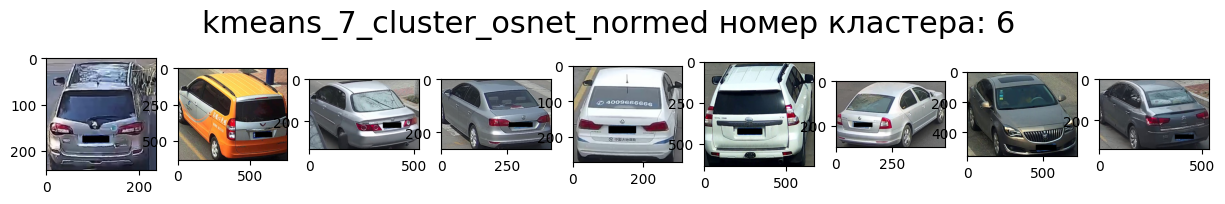

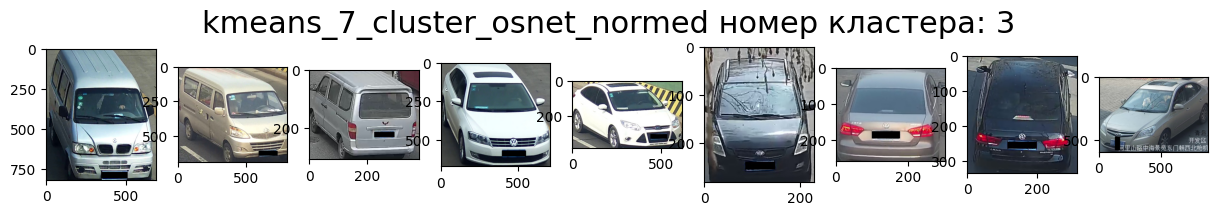

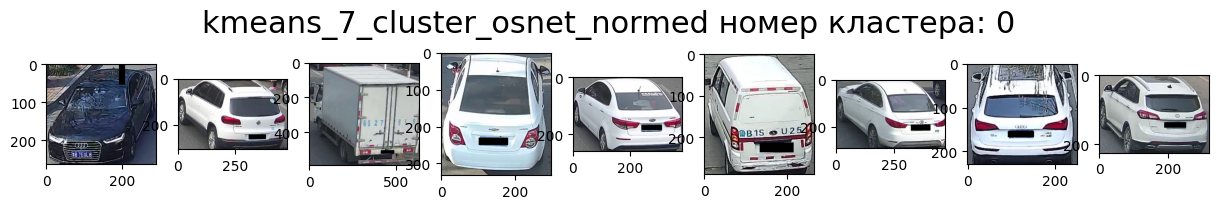

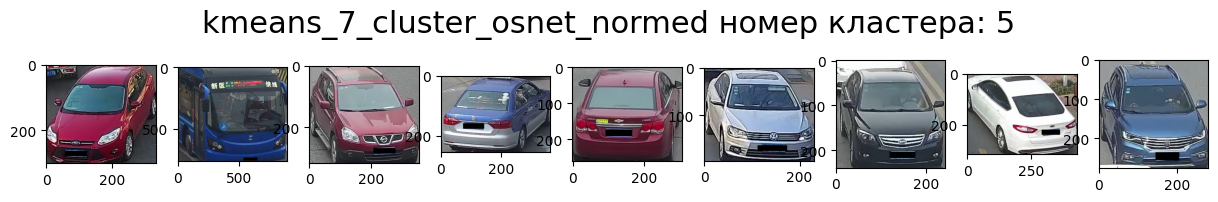

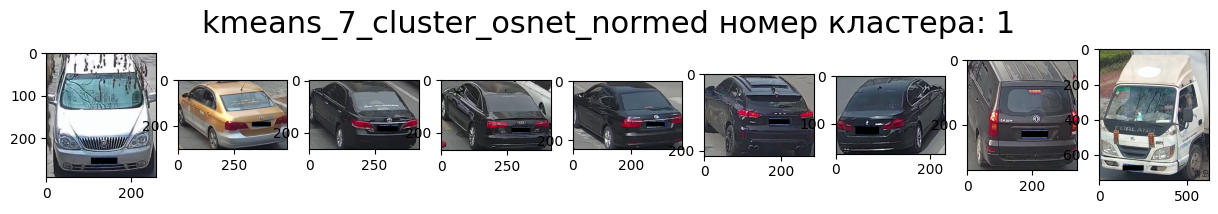

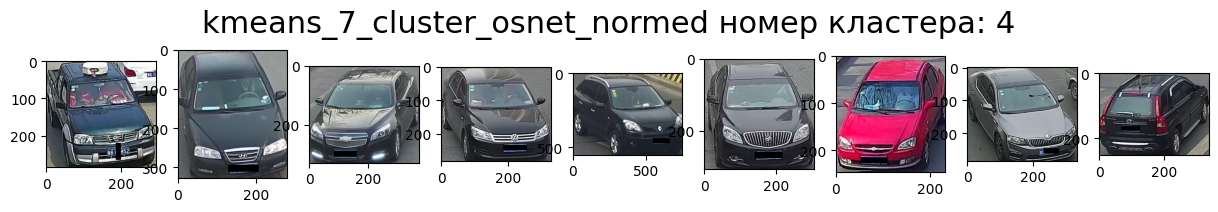

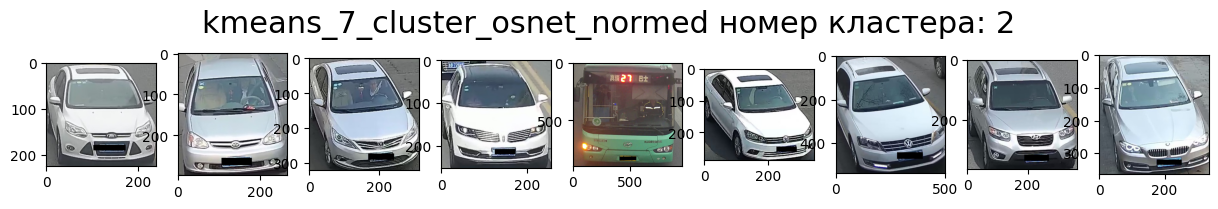

In [ ]:
plot_9_random_image(images_paths_final,'kmeans_7_cluster_osnet_normed',1)